In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import sys
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import h5py
import glob
from glob import glob

import tensorflow as tf

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical

#Biblioteca para rasters
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.enums import Resampling

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from tqdm import trange

In [2]:
path = "osmar_final4.aab"

src = rasterio.open(path)

raster = src.read(1)


cols = raster.shape[1] # colunas da imagem de entrada
rows = raster.shape[0] # linhas da imagem de entrada


labels = []
amostras = []


# Generating sample vector
for i in range(0, rows):
    
    labels.append(int(raster[i, 0]))

    features = []
    # Starting in 7, the other features are useless here
    for j in range(7, cols):
        features.append(float(raster[i, j]))
        
    amostra = []
    amostra.append(features)
        
    amostras.append(amostra)
    
amostras = np.array(amostras)

    
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
nClasses = len(np.unique(labels))

# label = np.transpose(label)
labels = to_categorical(labels, num_classes=nClasses)

C:\Users\Adm\Anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [3]:
from sklearn.model_selection import train_test_split

#funcao train_test_split seprara os dados
# test_size: numero entre 0 e 1 que determina a porcentagem de imagens de validacao
x_train, x_test, y_train, y_test = train_test_split(amostras, labels, test_size=0.4, random_state=42)

In [ ]:
model.load_weights("lstm_pesos.hdf5")

In [4]:
model = Sequential()
model.add(LSTM(200,input_shape=(amostras.shape[1], amostras.shape[2]), return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model.fit(x_train,
          y_train,
          validation_data=(x_test, y_test),
          epochs=800,
          batch_size=256,
          verbose=1)

Train on 13500 samples, validate on 1500 samples
Epoch 1/800
13500/13500 [==============================] - 8s 613us/sample - loss: 2.3032 - categorical_accuracy: 0.1099 - val_loss: 2.2887 - val_categorical_accuracy: 0.2580
Epoch 2/800
13500/13500 [==============================] - 0s 35us/sample - loss: 2.2867 - categorical_accuracy: 0.1344 - val_loss: 2.2368 - val_categorical_accuracy: 0.2393
Epoch 3/800
13500/13500 [==============================] - 0s 33us/sample - loss: 2.2106 - categorical_accuracy: 0.1904 - val_loss: 2.0384 - val_categorical_accuracy: 0.2073
Epoch 4/800
13500/13500 [==============================] - 0s 33us/sample - loss: 2.0969 - categorical_accuracy: 0.2195 - val_loss: 1.9344 - val_categorical_accuracy: 0.2407
Epoch 5/800
13500/13500 [==============================] - 0s 33us/sample - loss: 2.0164 - categorical_accuracy: 0.2507 - val_loss: 1.7626 - val_categorical_accuracy: 0.3873
Epoch 6/800
13500/13500 [==============================] - 0s 33us/sample - loss

13500/13500 [==============================] - 0s 34us/sample - loss: 1.3779 - categorical_accuracy: 0.4956 - val_loss: 0.9483 - val_categorical_accuracy: 0.6973
Epoch 45/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.3711 - categorical_accuracy: 0.5029 - val_loss: 0.9162 - val_categorical_accuracy: 0.7053
Epoch 46/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.3995 - categorical_accuracy: 0.4931 - val_loss: 0.9316 - val_categorical_accuracy: 0.6967
Epoch 47/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.3675 - categorical_accuracy: 0.4987 - val_loss: 0.9147 - val_categorical_accuracy: 0.7020
Epoch 48/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.3670 - categorical_accuracy: 0.4986 - val_loss: 0.9018 - val_categorical_accuracy: 0.7107
Epoch 49/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.3661 - categorical_accuracy: 0.5029 - val_loss: 0.925

Epoch 91/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.2115 - categorical_accuracy: 0.5701 - val_loss: 0.7494 - val_categorical_accuracy: 0.7640
Epoch 92/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.2228 - categorical_accuracy: 0.5615 - val_loss: 0.7177 - val_categorical_accuracy: 0.7813
Epoch 93/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.2222 - categorical_accuracy: 0.5674 - val_loss: 0.7221 - val_categorical_accuracy: 0.8060
Epoch 94/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.2203 - categorical_accuracy: 0.5661 - val_loss: 0.7348 - val_categorical_accuracy: 0.7940
Epoch 95/800
13500/13500 [==============================] - 0s 36us/sample - loss: 1.2143 - categorical_accuracy: 0.5700 - val_loss: 0.7092 - val_categorical_accuracy: 0.8033
Epoch 96/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.2226 - categorical_accuracy: 0.5667 - va

13500/13500 [==============================] - 0s 35us/sample - loss: 1.1569 - categorical_accuracy: 0.5963 - val_loss: 0.6450 - val_categorical_accuracy: 0.8147
Epoch 138/800
13500/13500 [==============================] - 0s 36us/sample - loss: 1.1379 - categorical_accuracy: 0.5993 - val_loss: 0.6415 - val_categorical_accuracy: 0.8173
Epoch 139/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.1586 - categorical_accuracy: 0.5887 - val_loss: 0.6519 - val_categorical_accuracy: 0.7947
Epoch 140/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.1500 - categorical_accuracy: 0.5953 - val_loss: 0.6340 - val_categorical_accuracy: 0.8187
Epoch 141/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.1614 - categorical_accuracy: 0.5899 - val_loss: 0.6360 - val_categorical_accuracy: 0.8107
Epoch 142/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.1521 - categorical_accuracy: 0.5939 - val_loss: 

13500/13500 [==============================] - 0s 34us/sample - loss: 1.0995 - categorical_accuracy: 0.6161 - val_loss: 0.6197 - val_categorical_accuracy: 0.8133
Epoch 184/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.1249 - categorical_accuracy: 0.6088 - val_loss: 0.6028 - val_categorical_accuracy: 0.8127
Epoch 185/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.1197 - categorical_accuracy: 0.6101 - val_loss: 0.6124 - val_categorical_accuracy: 0.8173
Epoch 186/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.1317 - categorical_accuracy: 0.6089 - val_loss: 0.6089 - val_categorical_accuracy: 0.8240
Epoch 187/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.1324 - categorical_accuracy: 0.6059 - val_loss: 0.6144 - val_categorical_accuracy: 0.8200
Epoch 188/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.1149 - categorical_accuracy: 0.6112 - val_loss: 

13500/13500 [==============================] - 0s 35us/sample - loss: 1.0913 - categorical_accuracy: 0.6241 - val_loss: 0.6066 - val_categorical_accuracy: 0.7973
Epoch 230/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.1076 - categorical_accuracy: 0.6199 - val_loss: 0.5952 - val_categorical_accuracy: 0.8213
Epoch 231/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0939 - categorical_accuracy: 0.6181 - val_loss: 0.5975 - val_categorical_accuracy: 0.8073
Epoch 232/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.1076 - categorical_accuracy: 0.6151 - val_loss: 0.6028 - val_categorical_accuracy: 0.8147
Epoch 233/800
13500/13500 [==============================] - 0s 37us/sample - loss: 1.0970 - categorical_accuracy: 0.6210 - val_loss: 0.5847 - val_categorical_accuracy: 0.8200
Epoch 234/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0716 - categorical_accuracy: 0.6270 - val_loss: 

13500/13500 [==============================] - 0s 35us/sample - loss: 1.0677 - categorical_accuracy: 0.6324 - val_loss: 0.5601 - val_categorical_accuracy: 0.8280
Epoch 276/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0497 - categorical_accuracy: 0.6373 - val_loss: 0.5555 - val_categorical_accuracy: 0.8347
Epoch 277/800
13500/13500 [==============================] - 0s 36us/sample - loss: 1.0759 - categorical_accuracy: 0.6297 - val_loss: 0.5776 - val_categorical_accuracy: 0.8260
Epoch 278/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0824 - categorical_accuracy: 0.6250 - val_loss: 0.5768 - val_categorical_accuracy: 0.8320
Epoch 279/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0796 - categorical_accuracy: 0.6318 - val_loss: 0.5639 - val_categorical_accuracy: 0.8273
Epoch 280/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0897 - categorical_accuracy: 0.6279 - val_loss: 

13500/13500 [==============================] - 0s 34us/sample - loss: 1.0753 - categorical_accuracy: 0.6292 - val_loss: 0.5633 - val_categorical_accuracy: 0.8387
Epoch 322/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0777 - categorical_accuracy: 0.6280 - val_loss: 0.5518 - val_categorical_accuracy: 0.8373
Epoch 323/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0709 - categorical_accuracy: 0.6305 - val_loss: 0.5609 - val_categorical_accuracy: 0.8307
Epoch 324/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0626 - categorical_accuracy: 0.6385 - val_loss: 0.5664 - val_categorical_accuracy: 0.8280
Epoch 325/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0724 - categorical_accuracy: 0.6369 - val_loss: 0.5676 - val_categorical_accuracy: 0.8253
Epoch 326/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0631 - categorical_accuracy: 0.6376 - val_loss: 

13500/13500 [==============================] - 0s 34us/sample - loss: 1.0427 - categorical_accuracy: 0.6388 - val_loss: 0.5520 - val_categorical_accuracy: 0.8267
Epoch 368/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0732 - categorical_accuracy: 0.6306 - val_loss: 0.5544 - val_categorical_accuracy: 0.8253
Epoch 369/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0515 - categorical_accuracy: 0.6372 - val_loss: 0.5692 - val_categorical_accuracy: 0.8260
Epoch 370/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0712 - categorical_accuracy: 0.6380 - val_loss: 0.5783 - val_categorical_accuracy: 0.8213
Epoch 371/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0692 - categorical_accuracy: 0.6342 - val_loss: 0.5633 - val_categorical_accuracy: 0.8307
Epoch 372/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0507 - categorical_accuracy: 0.6393 - val_loss: 

13500/13500 [==============================] - 0s 33us/sample - loss: 1.0509 - categorical_accuracy: 0.6376 - val_loss: 0.5347 - val_categorical_accuracy: 0.8353
Epoch 414/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0499 - categorical_accuracy: 0.6413 - val_loss: 0.5390 - val_categorical_accuracy: 0.8427
Epoch 415/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0301 - categorical_accuracy: 0.6486 - val_loss: 0.5452 - val_categorical_accuracy: 0.8333
Epoch 416/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0382 - categorical_accuracy: 0.6396 - val_loss: 0.5340 - val_categorical_accuracy: 0.8387
Epoch 417/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0313 - categorical_accuracy: 0.6489 - val_loss: 0.5386 - val_categorical_accuracy: 0.8313
Epoch 418/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0341 - categorical_accuracy: 0.6494 - val_loss: 

13500/13500 [==============================] - 0s 34us/sample - loss: 1.0478 - categorical_accuracy: 0.6410 - val_loss: 0.5376 - val_categorical_accuracy: 0.8293
Epoch 460/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0233 - categorical_accuracy: 0.6548 - val_loss: 0.5465 - val_categorical_accuracy: 0.8320
Epoch 461/800
13500/13500 [==============================] - 0s 36us/sample - loss: 1.0400 - categorical_accuracy: 0.6465 - val_loss: 0.5350 - val_categorical_accuracy: 0.8320
Epoch 462/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0237 - categorical_accuracy: 0.6511 - val_loss: 0.5243 - val_categorical_accuracy: 0.8367
Epoch 463/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0263 - categorical_accuracy: 0.6444 - val_loss: 0.5307 - val_categorical_accuracy: 0.8333
Epoch 464/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0314 - categorical_accuracy: 0.6472 - val_loss: 

13500/13500 [==============================] - 0s 33us/sample - loss: 1.0127 - categorical_accuracy: 0.6548 - val_loss: 0.5162 - val_categorical_accuracy: 0.8393
Epoch 506/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0464 - categorical_accuracy: 0.6399 - val_loss: 0.5359 - val_categorical_accuracy: 0.8407
Epoch 507/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0175 - categorical_accuracy: 0.6482 - val_loss: 0.5528 - val_categorical_accuracy: 0.8200
Epoch 508/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0228 - categorical_accuracy: 0.6506 - val_loss: 0.5503 - val_categorical_accuracy: 0.8240
Epoch 509/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0170 - categorical_accuracy: 0.6537 - val_loss: 0.5345 - val_categorical_accuracy: 0.8280
Epoch 510/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0538 - categorical_accuracy: 0.6395 - val_loss: 

13500/13500 [==============================] - 0s 34us/sample - loss: 1.0476 - categorical_accuracy: 0.6489 - val_loss: 0.5294 - val_categorical_accuracy: 0.8327
Epoch 552/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0295 - categorical_accuracy: 0.6528 - val_loss: 0.5342 - val_categorical_accuracy: 0.8267
Epoch 553/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0506 - categorical_accuracy: 0.6422 - val_loss: 0.5336 - val_categorical_accuracy: 0.8287
Epoch 554/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0267 - categorical_accuracy: 0.6524 - val_loss: 0.5461 - val_categorical_accuracy: 0.8293
Epoch 555/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0329 - categorical_accuracy: 0.6518 - val_loss: 0.5309 - val_categorical_accuracy: 0.8320
Epoch 556/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0272 - categorical_accuracy: 0.6513 - val_loss: 

13500/13500 [==============================] - 0s 35us/sample - loss: 1.0395 - categorical_accuracy: 0.6484 - val_loss: 0.5261 - val_categorical_accuracy: 0.8380
Epoch 598/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0212 - categorical_accuracy: 0.6512 - val_loss: 0.5201 - val_categorical_accuracy: 0.8433
Epoch 599/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0105 - categorical_accuracy: 0.6599 - val_loss: 0.5295 - val_categorical_accuracy: 0.8267
Epoch 600/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0228 - categorical_accuracy: 0.6530 - val_loss: 0.5200 - val_categorical_accuracy: 0.8367
Epoch 601/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0256 - categorical_accuracy: 0.6482 - val_loss: 0.5360 - val_categorical_accuracy: 0.8307
Epoch 602/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0390 - categorical_accuracy: 0.6427 - val_loss: 

13500/13500 [==============================] - 0s 35us/sample - loss: 1.0377 - categorical_accuracy: 0.6476 - val_loss: 0.5498 - val_categorical_accuracy: 0.8320
Epoch 644/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0447 - categorical_accuracy: 0.6447 - val_loss: 0.5586 - val_categorical_accuracy: 0.8213
Epoch 645/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0180 - categorical_accuracy: 0.6587 - val_loss: 0.5309 - val_categorical_accuracy: 0.8400
Epoch 646/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0300 - categorical_accuracy: 0.6517 - val_loss: 0.5172 - val_categorical_accuracy: 0.8473
Epoch 647/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0576 - categorical_accuracy: 0.6386 - val_loss: 0.5232 - val_categorical_accuracy: 0.8333
Epoch 648/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0550 - categorical_accuracy: 0.6427 - val_loss: 

13500/13500 [==============================] - 0s 34us/sample - loss: 1.0333 - categorical_accuracy: 0.6487 - val_loss: 0.5188 - val_categorical_accuracy: 0.8380
Epoch 690/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0517 - categorical_accuracy: 0.6450 - val_loss: 0.5233 - val_categorical_accuracy: 0.8420
Epoch 691/800
13500/13500 [==============================] - 0s 35us/sample - loss: 1.0416 - categorical_accuracy: 0.6493 - val_loss: 0.5387 - val_categorical_accuracy: 0.8340
Epoch 692/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0411 - categorical_accuracy: 0.6468 - val_loss: 0.5156 - val_categorical_accuracy: 0.8367
Epoch 693/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0409 - categorical_accuracy: 0.6445 - val_loss: 0.5357 - val_categorical_accuracy: 0.8333
Epoch 694/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0339 - categorical_accuracy: 0.6527 - val_loss: 

13500/13500 [==============================] - 0s 31us/sample - loss: 1.0488 - categorical_accuracy: 0.6450 - val_loss: 0.5357 - val_categorical_accuracy: 0.8240
Epoch 736/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0365 - categorical_accuracy: 0.6457 - val_loss: 0.5156 - val_categorical_accuracy: 0.8347
Epoch 737/800
13500/13500 [==============================] - 0s 31us/sample - loss: 1.0309 - categorical_accuracy: 0.6479 - val_loss: 0.5135 - val_categorical_accuracy: 0.8380
Epoch 738/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0375 - categorical_accuracy: 0.6479 - val_loss: 0.5093 - val_categorical_accuracy: 0.8420
Epoch 739/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0225 - categorical_accuracy: 0.6544 - val_loss: 0.5144 - val_categorical_accuracy: 0.8433
Epoch 740/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0239 - categorical_accuracy: 0.6535 - val_loss: 

13500/13500 [==============================] - 0s 34us/sample - loss: 1.0399 - categorical_accuracy: 0.6459 - val_loss: 0.5291 - val_categorical_accuracy: 0.8293
Epoch 782/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0379 - categorical_accuracy: 0.6420 - val_loss: 0.5554 - val_categorical_accuracy: 0.8253
Epoch 783/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0628 - categorical_accuracy: 0.6394 - val_loss: 0.5291 - val_categorical_accuracy: 0.8273
Epoch 784/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0423 - categorical_accuracy: 0.6466 - val_loss: 0.5267 - val_categorical_accuracy: 0.8340
Epoch 785/800
13500/13500 [==============================] - 0s 34us/sample - loss: 1.0351 - categorical_accuracy: 0.6499 - val_loss: 0.5287 - val_categorical_accuracy: 0.8320
Epoch 786/800
13500/13500 [==============================] - 0s 33us/sample - loss: 1.0389 - categorical_accuracy: 0.6475 - val_loss: 

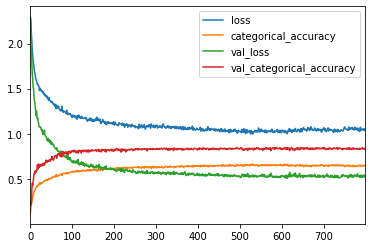

In [6]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

In [7]:
model.save_weights("lstm_pesos.hdf5")

In [8]:
model.save("lstm")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: lstm\assets


## Classificação

In [9]:
model = tf.saved_model.load("lstm")

infer = model.signatures["serving_default"]
print(infer.structured_outputs)

{'dense': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense')}


In [ ]:
path = "Hugo_corte2"
src = rasterio.open(path)
raster = src.read()

cols = raster.shape[1]
rows = raster.shape[2]

raster = raster.transpose(1,2,0).reshape(cols*rows,-1)
raster.shape = (raster.shape[0], 1, raster.shape[1])

classif = np.zeros((raster.shape[0], nClasses))

batch = 1500

for i in range(0, raster.shape[0], batch):
    classif[i:i+batch,:] = infer(tf.constant(raster[i:i+batch,:,:]))['dense_1']

pred = classif.argmax(axis=1)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(pred.reshape(2000,2000), cmap='Dark2')

In [ ]:
path = "Hugo_corte3"
src = rasterio.open(path)
raster = src.read()

cols = raster.shape[1]
rows = raster.shape[2]

raster = raster.transpose(1,2,0).reshape(cols*rows,-1)
raster.shape = (raster.shape[0], 1, raster.shape[1])

classif = np.zeros((raster.shape[0], nClasses))

batch = 1500

for i in range(0, raster.shape[0], batch):
    classif[i:i+batch,:] = infer(tf.constant(raster[i:i+batch,:,:]))['dense_1']

pred = classif.argmax(axis=1)